In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/Users/simjoo/Projects/STRT_wound/scripts/'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from WND_misc_scripts_v2_0 import *
from WND_neg_binom_regression_v2_0 import *
from WND_pseudotemporal_ordering_v2_0 import *
from WND_outlier_cell_detection_v2_0 import *

In [5]:
from matplotlib_venn import venn2

# Initialize engines

In [6]:
from ipyparallel import Client

In [7]:
c = Client(profile='default')

In [8]:
dview = c[:]

In [9]:
dview.execute('import sys')
dview.execute('sys.path.append("/Users/simjoo/Projects/STRT_wound/scripts/")')
dview.execute('from WND_misc_scripts_v2_0 import *')
dview.execute('from WND_neg_binom_regression_v2_0 import *')
dview.execute('from WND_pseudotemporal_ordering_v2_0 import *')
dview.execute('from WND_outlier_cell_detection_v2_0 import *')

<AsyncResult: execute>

# Import Data

In [10]:
exp_id = '201603171136_v2.6'
path_input = '/Users/simjoo/Projects/STRT_wound/data_input/v2.6'
path_output = '/Users/simjoo/Projects/STRT_wound/data_output/v2.6'
path_figures = '/Users/simjoo/Projects/STRT_wound/figures/v2.6'

In [11]:
seq = loadData_v1(path_input, exp_id, 'seq_WND', 'DataFrame')
meta = loadData_v1(path_input, exp_id, 'meta_WND', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [12]:
seq_sel_norm = loadData_v1(path_output, exp_id, 'seq_sel_norm', 'DataFrame')
seq_sel_Lgr5_norm = loadData_v1(path_output, exp_id, 'seq_sel_Lgr5_norm', 'DataFrame')
seq_sel_Lgr6_norm = loadData_v1(path_output, exp_id, 'seq_sel_Lgr6_norm', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [13]:
cells_Lgr5_wnd = loadData_v1(path_output, exp_id, 'cells_Lgr5_wnd', 'Series')
cells_Lgr5_wnd_ctrl = loadData_v1(path_output, exp_id, 'cells_Lgr5_wnd_ctrl', 'Series')
cells_Lgr5_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cells_Lgr5_wnd_ctrl_sel', 'Series')

cells_Lgr6_wnd = loadData_v1(path_output, exp_id, 'cells_Lgr6_wnd', 'Series')
cells_Lgr6_wnd_ctrl = loadData_v1(path_output, exp_id, 'cells_Lgr6_wnd_ctrl', 'Series')
cells_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cells_Lgr6_wnd_ctrl_sel', 'Series')

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [14]:
cl_Lgr5_wnd = loadData_v1(path_output, exp_id, 'cl_Lgr5_wnd', 'Series').astype(str)
cl_Lgr5_wnd = AP_groups_reorder_v2(cl_Lgr5_wnd, ['3','2','0','1','4'])

cl_Lgr5_wnd_ctrl = loadData_v1(path_output, exp_id, 'cl_Lgr5_wnd_ctrl', 'Series')
cl_Lgr5_wnd_ctrl = AP_groups_reorder_v2(cl_Lgr5_wnd_ctrl, ['ctrl','3','2','0','1','4'])

cl_Lgr5_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cl_Lgr5_wnd_ctrl_sel', 'Series')
cl_Lgr5_wnd_ctrl_sel = AP_groups_reorder_v2(cl_Lgr5_wnd_ctrl_sel, ['ctrl','3','2','0','1','4'])

cl_Lgr6_wnd = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd', 'Series').astype(str)
cl_Lgr6_wnd = AP_groups_reorder_v2(cl_Lgr6_wnd[cl_Lgr6_wnd!='3'], ['5','1','4','2','0'])

cl_Lgr6_wnd_ctrl = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd_ctrl', 'Series')
cl_Lgr6_wnd_ctrl = AP_groups_reorder_v2(cl_Lgr6_wnd_ctrl[cl_Lgr6_wnd_ctrl!='3'], ['ctrl - IFE','ctrl - IST','5','1','4','2','0'])

cl_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd_ctrl_sel', 'Series')
cl_Lgr6_wnd_ctrl_sel = AP_groups_reorder_v2(cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel!='3'], ['ctrl - IFE','ctrl - IST','5','1','4','2','0'])

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [15]:
tsne_Lgr5_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'tsne_Lgr5_wnd_ctrl_sel', 'DataFrame')

tsne_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'tsne_Lgr6_wnd_ctrl_sel', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [16]:
NBR_states_traces = loadData_from_pickle_v1(path_output, exp_id, 'NBR_states_traces')
NBR_states_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_states_summary')

NBR_states_Lgr5_pval_0d = loadData_from_pickle_v1(path_output,exp_id,'NBR_states_Lgr5_pval_0d')
NBR_states_Lgr6_pval_0d = loadData_from_pickle_v1(path_output,exp_id,'NBR_states_Lgr6_pval_0d')

In [17]:
NBR_1st_traces = loadData_from_pickle_v1(path_input, '201509151726', 'NBR_1st_traces')

In [18]:
cmap_Lgr5_time = loadData_v1(path_output, exp_id, 'cmap_Lgr5_time', 'Series')
cmap_Lgr6_time = loadData_v1(path_output, exp_id, 'cmap_Lgr6_time', 'Series')
cmap_Lgr5_state = loadData_v1(path_output, exp_id, 'cmap_Lgr5_state', 'Series')
cmap_Lgr6_state = loadData_v1(path_output, exp_id, 'cmap_Lgr6_state', 'Series')

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [19]:
def get_hypergeometric_distribution(k, K, N, n):
    
    from scipy.stats import hypergeom
    
    return 1 - hypergeom.cdf((k-1), N, K, n).astype(np.float128)

In [20]:
def get_hypergeometric_distribution_R(k, K, N, n):
    
    return stats.phyper(k-1, K, N-K, n, lower_tail = False)[0]

# Functional signatures

### Select genes induced in at least one wound population

In [150]:
NBR_states_pval_0d = pd.concat([NBR_states_Lgr5_pval_0d,NBR_states_Lgr6_pval_0d],axis=1)

In [151]:
return_unique(cl_Lgr6_wnd_ctrl_sel)

['ctrl - IFE', 'ctrl - IST', '5', '1', '4', '2', '0']

In [152]:
gr_sel = ['Lgr5 - 3', 'Lgr5 - 2', 'Lgr5 - 0', 'Lgr5 - 1', 'Lgr5 - 4',
          'Lgr6 - 5', 'Lgr6 - 1', 'Lgr6 - 4', 'Lgr6 - 2', 'Lgr6 - 0']
genes_sign = NBR_states_pval_0d[gr_sel].min(axis=1)[NBR_states_pval_0d[gr_sel].min(axis=1)<0.001].index

In [153]:
NBR_states_pval_0d_sel = NBR_states_pval_0d[gr_sel]

In [154]:
len(genes_sign)

1534

In [155]:
#for g in genes_sign:
    #print (g)

### Import gene sets from MSigDB

In [156]:
gene_sets_MSigDB = pd.read_csv('%s/MSigDB_gene_sets.txt' % path_input, sep = '\t')
#gene_sets_MSigDB_stats = pd.read_csv('%s/%s_MSigDB_Reactome.txt' % (path_output, exp_id), sep = '\t', index_col = 0)
#gene_sets_MSigDB_stats_KEGG = pd.read_csv('%s/%s_MSigDB_KEGG.txt' % (path_output, exp_id), sep = '\t', index_col = 0)

In [157]:
gene_sets_MSigDB_dict = {}

for c in gene_sets_MSigDB.columns:
    gene_sets_MSigDB_dict[c] = list(set([g for g in gene_sets_MSigDB[c].values if type(g) == str]))

### Import signatures from Joost et al. 2016 and combine with MSigDB

In [158]:
NBR_1st_bin_bl = loadData_from_pickle_v1(path_input, '201509151726', 'NBR_1st_bin_bl')

In [159]:
gene_sets_telogen_bl = {}

NBR = NBR_1st_bin_bl

gene_sets_MSigDB_dict['JOOST_IFE B'] = list(NBR['2'][NBR['2']==1].index)
gene_sets_MSigDB_dict['JOOST_IFE D'] = list(set(list(NBR['1'][NBR['1']==1].index) + list(NBR['8'][NBR['8']==1].index)))
gene_sets_MSigDB_dict['JOOST_IFE K'] = list(set(list(NBR['0'][NBR['0']==1].index) + list(NBR['10'][NBR['10']==1].index)))
gene_sets_MSigDB_dict['JOOST_uHF'] = list(set(list(NBR['6'][NBR['6']==1].index) + list(NBR['3'][NBR['3']==1].index) + list(NBR['4'][NBR['4']==1].index)))
gene_sets_MSigDB_dict['JOOST_SG'] = list(NBR['5'][NBR['5']==1].index)
gene_sets_MSigDB_dict['JOOST_OB'] = list(NBR['7'][NBR['7']==1].index)
gene_sets_MSigDB_dict['JOOST_IB'] = list(NBR['9'][NBR['9']==1].index)
gene_sets_MSigDB_dict['JOOST_Immune'] = list(set(list(NBR['11'][NBR['11']==1].index) + list(NBR['12'][NBR['12']==1].index)))

In [160]:
for k in gene_sets_MSigDB_dict.keys():
    print(k)

REACTOME_METABOLISM_OF_PROTEINS
KEGG_RIBOSOME
REACTOME_3_UTR_MEDIATED_TRANSLATIONAL_REGULATION
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE
REACTOME_ER_PHAGOSOME_PATHWAY
KEGG_PROTEASOME
REACTOME_PROTEIN_FOLDING
REACTOME_METABOLISM_OF_RNA
REACTOME_NONSENSE_MEDIATED_DECAY_ENHANCED_BY_THE_EXON_JUNCTION_COMPLEX
REACTOME_ACTIVATION_OF_THE_MRNA_UPON_BINDING_OF_THE_CAP_BINDING_COMPLEX_AND_EIFS_AND_SUBSEQUENT_BINDING_TO_43S
REACTOME_DESTABILIZATION_OF_MRNA_BY_AUF1_HNRNP_D0
REACTOME_MRNA_SPLICING
REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA
REACTOME_MRNA_PROCESSING
KEGG_OXIDATIVE_PHOSPHORYLATION
REACTOME_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT
REACTOME_RESPIRATORY_ELECTRON_TRANSPORT_ATP_SYNTHESIS_BY_CHEMIOSMOTIC_COUPLING_AND_HEAT_PRODUCTION_BY_UNCOUPLING_PROTEINS_
REACTOME_IMMUNE_SYSTEM
REACTOME_ADAPTIVE_IMMUNE_SYSTEM
REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION
REACTOME_ACTIVATION_OF_NF_KAPPAB_IN_B_CELLS
REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR
R

# Condensed visualization

### Get count of significant genes and q-vals

In [161]:
N = len(NBR_states_Lgr5_pval_0d.index)
B = {'REACTOME':674,'KEGG':186,'HALLMARK':50,'JOOST':8,'GO':5917}

In [162]:
return_unique(cl_Lgr6_wnd_ctrl_sel)

['ctrl - IFE', 'ctrl - IST', '5', '1', '4', '2', '0']

In [163]:
groups = {'PrC - Lgr5':['Lgr5 - 3'],
          'WF - Lgr5':['Lgr5 - 2', 'Lgr5 - 0'],
          'WEpB - Lgr5':['Lgr5 - 1', 'Lgr5 - 4'],
          'WF - Lgr6':['Lgr6 - 5', 'Lgr6 - 1'],
          'WEpB - Lgr6':['Lgr6 - 4'],
          'WEpD - Lgr6':['Lgr6 - 0', 'Lgr6 - 2']}

NBR = NBR_states_pval_0d_sel
cutoff = 0.001

count_sig = pd.DataFrame(0, index = gene_sets_MSigDB_dict.keys(), columns = ['all'] + list(groups.keys()))
pvals_sig = pd.DataFrame(1, index = gene_sets_MSigDB_dict.keys(), columns = ['all'] + list(groups.keys()))

for sig in gene_sets_MSigDB_dict.keys():
    for gr in groups.keys():
        
        #cell states
        
        gsig_tmp = gene_sets_MSigDB_dict[sig]
        K_tmp = len(gsig_tmp)
        ggr_tmp = NBR[groups[gr]][NBR[groups[gr]].min(axis=1)<cutoff].index
        n_tmp = len(ggr_tmp)
        k_tmp = len(set(gsig_tmp) & set(ggr_tmp))
        count_sig.ix[sig,gr] = k_tmp
        pvals_sig.ix[sig,gr] = get_hypergeometric_distribution_R(k_tmp,K_tmp,N,n_tmp) #* B[sig.split('_')[0]]
        
    # all wnd cells
        
    ggr_tmp = genes_sign
    n_tmp = len(ggr_tmp)
    k_tmp = len(set(gsig_tmp) & set(ggr_tmp))
    count_sig.ix[sig,'all'] = k_tmp
    pvals_sig.ix[sig,'all'] = get_hypergeometric_distribution_R(k_tmp,K_tmp,N,n_tmp) #* B[sig.split('_')[0]]
        
pvals_sig[pvals_sig>1] = 1

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [164]:
pvals_sig_BH = pvals_sig.copy()
for gr in pvals_sig_BH.columns: pvals_sig_BH[gr] = stats.p_adjust(FloatVector(pvals_sig_BH[gr]), method = 'BH')

In [165]:
groups = ['PrC - Lgr5','WF - Lgr5','WEpB - Lgr5','WF - Lgr6','WEpB - Lgr6','WEpD - Lgr6',]

sig_max_gr = {}
for gr in groups: sig_max_gr[gr] = []

data = pvals_sig_BH[groups].astype(float)
data[data==0] = 1e-15
data = -np.log10(data)

for sig in data.index:
    sig_max_gr[data.ix[sig].sort_values().index[-1]] += [sig]

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [41]:
sig_max_gr

{'PrC - Lgr5': ['REACTOME_CYTOKINE_SIGNALING_IN_IMMUNE_SYSTEM',
  'KEGG_ENDOCYTOSIS',
  'HALLMARK_HYPOXIA',
  'HALLMARK_APOPTOSIS',
  'HALLMARK_TNFA_SIGNALING_VIA_NFKB',
  'JOOST_OB'],
 'WEpB - Lgr5': ['REACTOME_MRNA_SPLICING',
  'KEGG_PURINE_METABOLISM',
  'KEGG_SPLICEOSOME',
  'REACTOME_RNA_POL_II_TRANSCRIPTION',
  'KEGG_CELL_CYCLE',
  'HALLMARK_G2M_CHECKPOINT',
  'HALLMARK_P53_PATHWAY',
  'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION'],
 'WEpB - Lgr6': ['REACTOME_METABOLISM_OF_PROTEINS',
  'KEGG_RIBOSOME',
  'REACTOME_3_UTR_MEDIATED_TRANSLATIONAL_REGULATION',
  'REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE',
  'REACTOME_METABOLISM_OF_RNA',
  'REACTOME_NONSENSE_MEDIATED_DECAY_ENHANCED_BY_THE_EXON_JUNCTION_COMPLEX',
  'REACTOME_ACTIVATION_OF_THE_MRNA_UPON_BINDING_OF_THE_CAP_BINDING_COMPLEX_AND_EIFS_AND_SUBSEQUENT_BINDING_TO_43S',
  'REACTOME_TRANSLATION',
  'REACTOME_FORMATION_OF_THE_TERNARY_COMPLEX_AND_SUBSEQUENTLY_THE_43S_COMPLEX'],
 'WEpD - Lgr6': ['KEGG_P53_S

### Plot number of significant genes

In [148]:
gsets_ordered = ['HALLMARK_TNFA_SIGNALING_VIA_NFKB',
 'KEGG_STEROID_BIOSYNTHESIS',
 'REACTOME_RNA_POL_III_TRANSCRIPTION',
 'HALLMARK_MYC_TARGETS_V1',
 'HALLMARK_MTORC1_SIGNALING',
 'KEGG_PROTEASOME',
 'JOOST_IFE B',
 'REACTOME_DESTABILIZATION_OF_MRNA_BY_AUF1_HNRNP_D0',
 'REACTOME_PREFOLDIN_MEDIATED_TRANSFER_OF_SUBSTRATE_TO_CCT_TRIC',
 'REACTOME_PROTEIN_FOLDING',
 'REACTOME_REGULATION_OF_ORNITHINE_DECARBOXYLASE_ODC',
 'REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES',
 'REACTOME_SIGNALING_BY_WNT',
 'REACTOME_ER_PHAGOSOME_PATHWAY',
 'KEGG_CARDIAC_MUSCLE_CONTRACTION',
 'REACTOME_CYTOSOLIC_TRNA_AMINOACYLATION', 
 'REACTOME_M_G1_TRANSITION',
 'REACTOME_MITOTIC_M_M_G1_PHASES',
 'REACTOME_S_PHASE',
 'REACTOME_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT',
 'REACTOME_MRNA_SPLICING',
 'REACTOME_METABOLISM_OF_NUCLEOTIDES',
 'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
 'KEGG_MISMATCH_REPAIR',
 'REACTOME_ACTIVATION_OF_THE_MRNA_UPON_BINDING_OF_THE_CAP_BINDING_COMPLEX_AND_EIFS_AND_SUBSEQUENT_BINDING_TO_43S',
 'REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE',
 'REACTOME_3_UTR_MEDIATED_TRANSLATIONAL_REGULATION',
 'REACTOME_TRANSLATION',
 'HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY',
 'JOOST_IFE D']

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


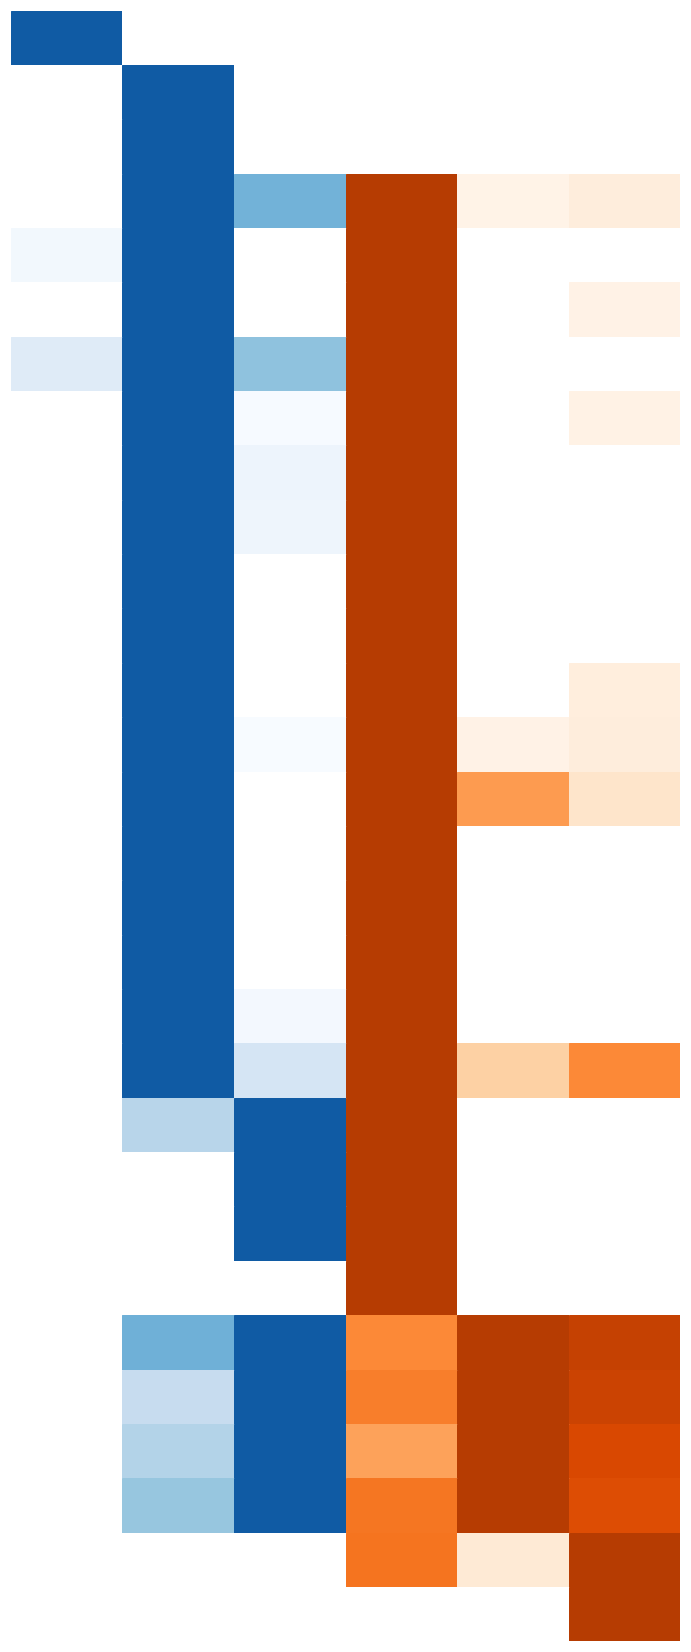

In [201]:
gene_sets = gsets_ordered
groups = ['PrC - Lgr5','WF - Lgr5','WEpB - Lgr5','WF - Lgr6','WEpB - Lgr6','WEpD - Lgr6',]
gr_Lgr5 = ['PrC - Lgr5','WF - Lgr5','WEpB - Lgr5']
gr_Lgr6 = ['WF - Lgr6','WEpB - Lgr6','WEpD - Lgr6']
alpha = -np.log10(0.05)
data1 = pvals_sig_BH.astype(float)
data1 = -np.log10(data1)
data1 = data1.ix[gene_sets, groups]
data2 = data1.copy()
data2[gr_Lgr5] = data1.apply(lambda x: (x[gr_Lgr5] - alpha) / (np.max(x[gr_Lgr5]) - alpha), axis = 1)
data2[gr_Lgr6] = data1.apply(lambda x: (x[gr_Lgr6] - alpha) / (np.max(x[gr_Lgr6]) - alpha), axis = 1)
cmap1 = plt.cm.Blues
cmap2 = plt.cm.Oranges

#initialize figure

height = 1 * len(data1.index)
width = 2 * len(data1.columns)

plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(len(data1.index), 
                  len(data1.columns), 
                  hspace=0.0, 
                  wspace = 0.0)

#plot heatmap

for c, gr in enumerate(['PrC - Lgr5','WF - Lgr5','WEpB - Lgr5','WF - Lgr6','WEpB - Lgr6','WEpD - Lgr6',]):
    for r, sig in enumerate(data1.index):
        ax = plt.subplot(gs[r,c])
        ax.set_xlim(0,1)
        v = data1.ix[sig,gr]
        if v < alpha:
            col = '#ffffff'
        elif gr in gr_Lgr5:
            col = cmap1(data2.ix[r,c]/1.2)
        elif gr in gr_Lgr6:
            col = cmap2(data2.ix[r,c]/1.2)
        ax.axvspan(0,1, color = col)
        clean_axis(ax)


figname = 'v2.6_3_Lgr5_Lgr6_functional_sig_count_cond.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

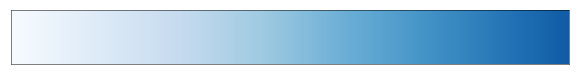

In [99]:
cmap = plt.cm.Blues
     
height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()
axLabel.set_xlim(0.0, 1.0 / 1.2)

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
remove_ticks(axLabel)


figname = 'v2.6_3_pval_Legend1.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

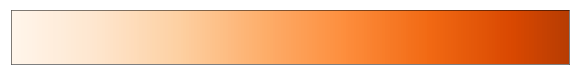

In [100]:
cmap = plt.cm.Oranges
     
height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()
axLabel.set_xlim(0.0, 1.0 / 1.2)

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
remove_ticks(axLabel)

figname = 'v2.6_3_pval_Legend2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Plot q-values (absolute)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


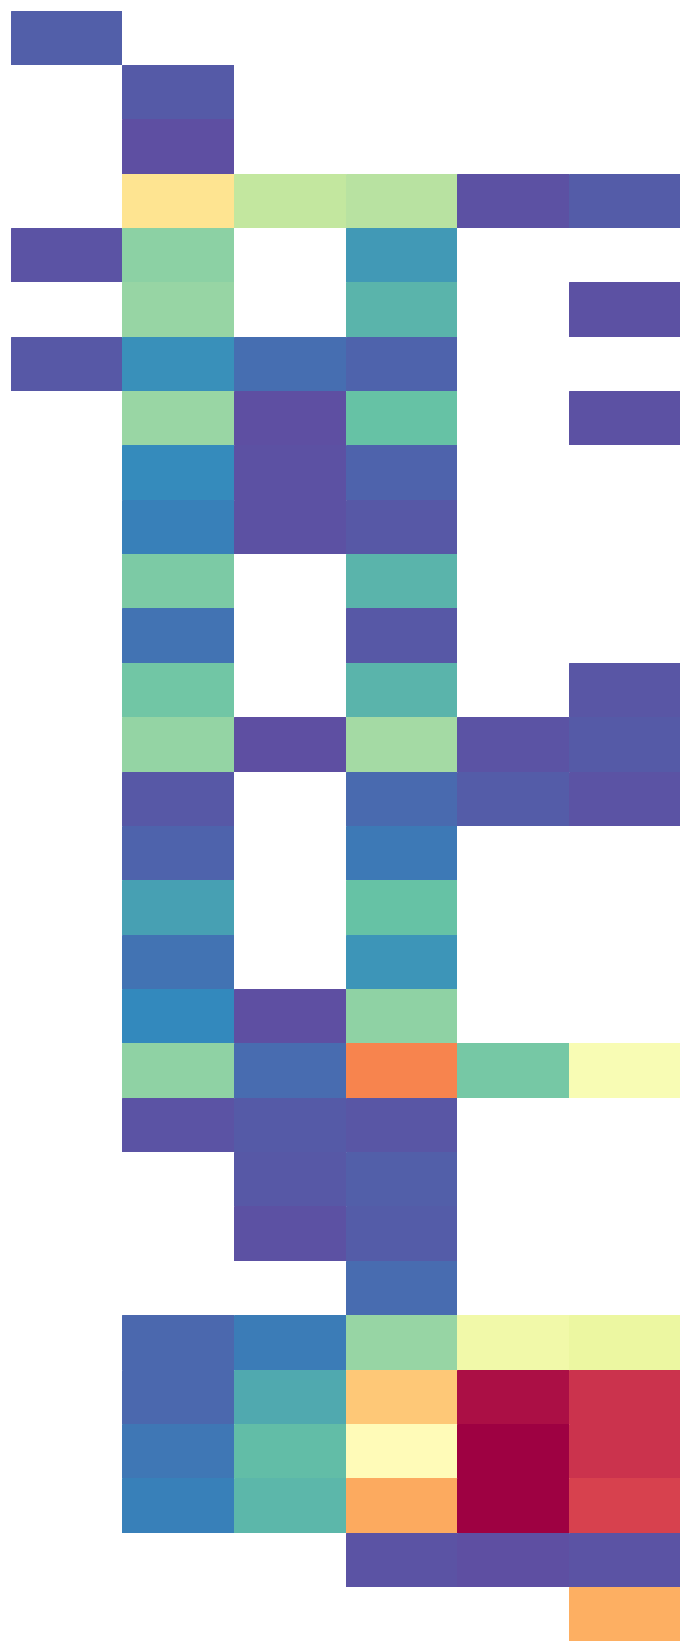

In [173]:
gene_sets = gsets_ordered
groups = ['PrC - Lgr5','WF - Lgr5','WEpB - Lgr5','WF - Lgr6','WEpB - Lgr6','WEpD - Lgr6',]
alpha = -np.log10(0.05)
data1 = pvals_sig_BH.astype(float)
data1 = -np.log10(data1)
data1 = data1.ix[gene_sets, groups]
cmap1 = plt.cm.Spectral_r
vmin = alpha
vmax = 50

#initialize figure

height = 1 * len(data1.index)
width = 2 * len(data1.columns)

plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(len(data1.index), 
                  len(data1.columns), 
                  hspace=0.0, 
                  wspace = 0.0)

#plot heatmap

for c, gr in enumerate(['PrC - Lgr5','WF - Lgr5','WEpB - Lgr5','WF - Lgr6','WEpB - Lgr6','WEpD - Lgr6',]):
    for r, sig in enumerate(data1.index):
        ax = plt.subplot(gs[r,c])
        ax.set_xlim(0,1)
        v = data1.ix[sig,gr]
        if v < alpha:
            col = '#ffffff'
        else:
            col = cmap1((data1.ix[r,c]-vmin)/(vmax-vmin))
        ax.axvspan(0,1, color = col)
        clean_axis(ax)


figname = 'v2.6_3_Lgr5_Lgr6_functional_sig_count_cond_abs.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

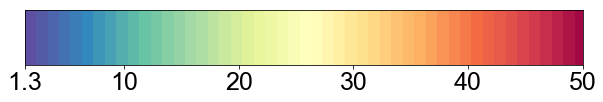

In [178]:
cmap = plt.cm.Spectral_r
     
height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()
axLabel.set_xlim(vmin,vmax)
axLabel.set_xticks([1.3, 10,20,30,40,50])
axLabel.set_xticklabels([1.3, 10,20,30,40,50], family = 'Arial', fontsize = 25)
axLabel.set_yticks([])


for pos in np.arange(vmin, vmax, 1):
    axLabel.axvspan(pos, pos + 1, color = cmap((pos-vmin)/(vmax-vmin)))
    
#remove_ticks(axLabel)


figname = 'v2.6_3_pval_Legend_abs.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Plot counts (absolute)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


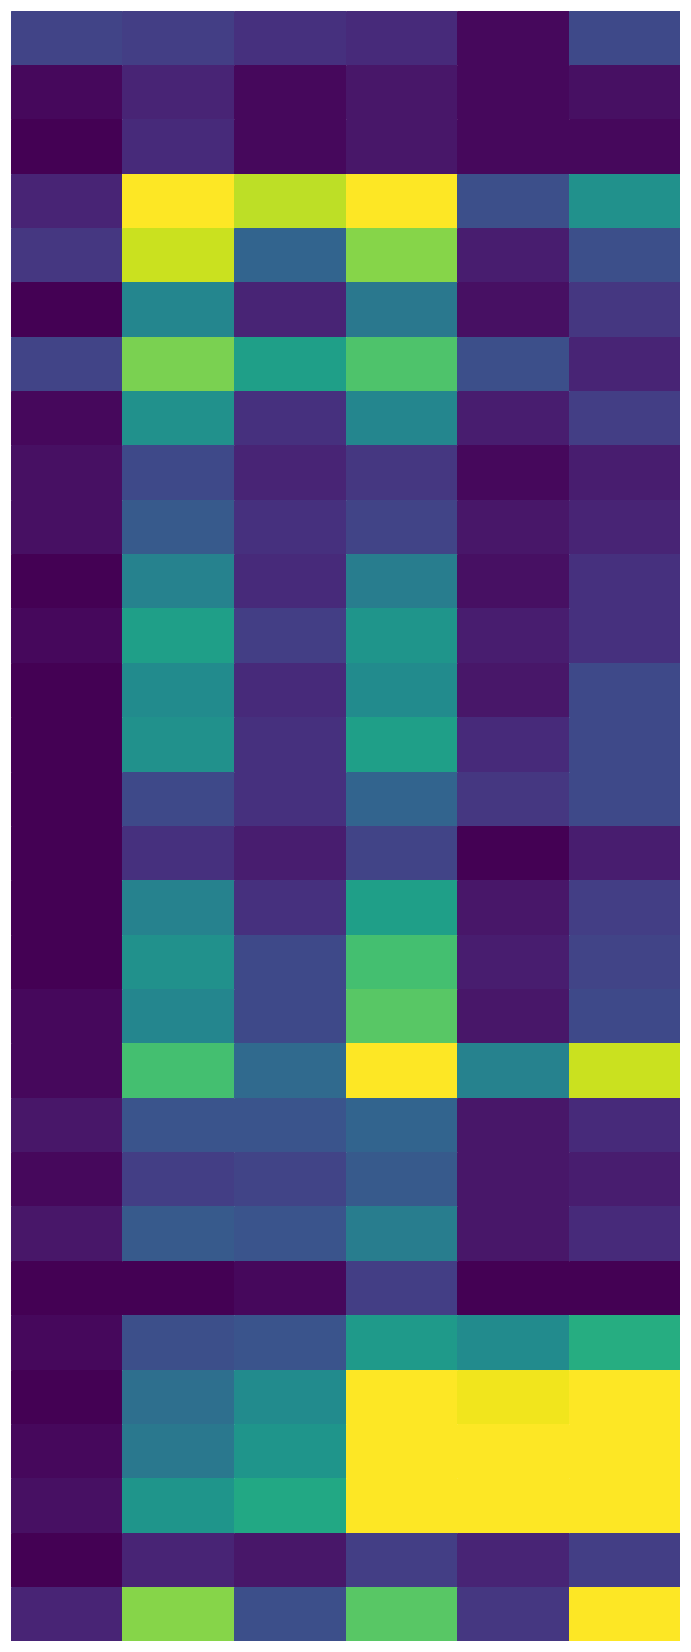

In [185]:
gene_sets = gsets_ordered
groups = ['PrC - Lgr5','WF - Lgr5','WEpB - Lgr5','WF - Lgr6','WEpB - Lgr6','WEpD - Lgr6',]
data1 = count_sig.ix[gene_sets, groups]
cmap1 = plt.cm.viridis
vmin = 0
vmax = 50

#initialize figure

height = 1 * len(data1.index)
width = 2 * len(data1.columns)

plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(len(data1.index), 
                  len(data1.columns), 
                  hspace=0.0, 
                  wspace = 0.0)

#plot heatmap

for c, gr in enumerate(['PrC - Lgr5','WF - Lgr5','WEpB - Lgr5','WF - Lgr6','WEpB - Lgr6','WEpD - Lgr6',]):
    for r, sig in enumerate(data1.index):
        ax = plt.subplot(gs[r,c])
        ax.set_xlim(0,1)
        col = cmap1((data1.ix[r,c]-vmin)/(vmax-vmin))
        ax.axvspan(0,1, color = col)
        clean_axis(ax)


figname = 'v2.6_3_Lgr5_Lgr6_functional_count_abs.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

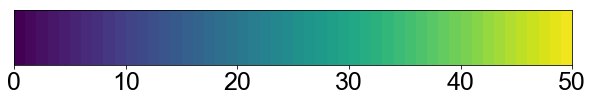

In [187]:
cmap = plt.cm.viridis
     
height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()
axLabel.set_xlim(vmin,vmax)
axLabel.set_xticks([0, 10,20,30,40,50])
axLabel.set_xticklabels([0, 10,20,30,40,50], family = 'Arial', fontsize = 25)
axLabel.set_yticks([])


for pos in np.arange(vmin, vmax, 1):
    axLabel.axvspan(pos, pos + 1, color = cmap((pos-vmin)/(vmax-vmin)))
    
#remove_ticks(axLabel)


figname = 'v2.6_3_pval_Legend_count.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Interaction between Lgr5 and Lgr6 WF cells and wound environment

In [21]:
PairsLigRec_mm = loadData_v1(path_input, exp_id, 'PairsLigRec_mm', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [22]:
ligands = list(set(PairsLigRec_mm['Ligand.ApprovedSymbol_mm'].values))
receptors = list(set(PairsLigRec_mm['Receptor.ApprovedSymbol_mm'].values))

### Define genes expressed in Lgr5 and Lgr6 WF and ctrl (lower 0-day control serves as Baseline)

In [23]:
NBR_states_pval_Lgr5_0d = neg_binom_estimate_prob_v1P(NBR_states_traces, 'Lgr5 - ctrl', dview)
NBR_states_pval_Lgr6_0d = neg_binom_estimate_prob_v1P(NBR_states_traces, 'Lgr6 - ctrl - IFE', dview)

In [24]:
#saveData_to_pickle_v1(NBR_states_pval_Lgr5_0d, path_output, exp_id, 'NBR_states_pval_Lgr5_0d')
#saveData_to_pickle_v1(NBR_states_pval_Lgr6_0d, path_output, exp_id, 'NBR_states_pval_Lgr6_0d')

In [23]:
NBR_states_pval_Lgr5_0d = loadData_from_pickle_v1(path_output, exp_id, 'NBR_states_pval_Lgr5_0d')
NBR_states_pval_Lgr6_0d = loadData_from_pickle_v1(path_output, exp_id, 'NBR_states_pval_Lgr6_0d')

In [24]:
NBR_states_pval_Lgr5_0d_bin = neg_binom_get_binarized(NBR_states_pval_Lgr5_0d, 0.01)
NBR_states_pval_Lgr5_0d_bin['Lgr5 - ctrl'] = 0 
NBR_states_pval_Lgr6_0d_bin = neg_binom_get_binarized(NBR_states_pval_Lgr6_0d, 0.01)
NBR_states_pval_Lgr6_0d_bin['Lgr6 - ctrl - IFE'] = 0

In [25]:
NBR_states_pval_0d_bin = NBR_states_pval_Lgr5_0d_bin + NBR_states_pval_Lgr6_0d_bin

In [26]:
genes_expr_ctrl_Lgr5 = NBR_states_pval_0d_bin['Lgr5 - ctrl'][NBR_states_pval_0d_bin['Lgr5 - ctrl']>0].index
genes_expr_ctrl_Lgr6 = NBR_states_pval_0d_bin['Lgr6 - ctrl - IFE'][NBR_states_pval_0d_bin['Lgr6 - ctrl - IFE']>0].index

In [27]:
print(len(genes_expr_ctrl_Lgr5), len(genes_expr_ctrl_Lgr6))

527 1537


In [28]:
gr_WF_Lgr5 = ['Lgr5 - 2', 'Lgr5 - 0']
genes_expr_WF_Lgr5 = NBR_states_pval_0d_bin[gr_WF_Lgr5].sum(axis=1)[NBR_states_pval_0d_bin[gr_WF_Lgr5].sum(axis=1)>0].index

gr_WF_Lgr6 = ['Lgr6 - 5', 'Lgr6 - 1']
genes_expr_WF_Lgr6 = NBR_states_pval_0d_bin[gr_WF_Lgr6].sum(axis=1)[NBR_states_pval_0d_bin[gr_WF_Lgr6].sum(axis=1)>0].index

In [29]:
print(len(genes_expr_WF_Lgr5), len(genes_expr_WF_Lgr6))

1662 2400


### Define receptors / ligands expressed in Lgr5 and Lgr6 WF and ctrl 

In [30]:
ligands_expr_ctrl_Lgr5 = [g for g in genes_expr_ctrl_Lgr5 if g in ligands]
ligands_expr_ctrl_Lgr6  = [g for g in genes_expr_ctrl_Lgr6 if g in ligands]

receptors_expr_ctrl_Lgr5  = [g for g in genes_expr_ctrl_Lgr5 if g in receptors]
receptors_expr_ctrl_Lgr6  = [g for g in genes_expr_ctrl_Lgr6 if g in receptors]

In [31]:
print(len(ligands_expr_ctrl_Lgr5), len(ligands_expr_ctrl_Lgr6), len(receptors_expr_ctrl_Lgr5), len(receptors_expr_ctrl_Lgr6))

38 43 33 60


In [32]:
ligands_expr_WF_Lgr5 = [g for g in genes_expr_WF_Lgr5 if g in ligands]
ligands_expr_WF_Lgr6  = [g for g in genes_expr_WF_Lgr6 if g in ligands]

receptors_expr_WF_Lgr5  = [g for g in genes_expr_WF_Lgr5 if g in receptors]
receptors_expr_WF_Lgr6  = [g for g in genes_expr_WF_Lgr6 if g in receptors]

In [33]:
print(len(ligands_expr_WF_Lgr5), len(ligands_expr_WF_Lgr6), len(receptors_expr_WF_Lgr5), len(receptors_expr_WF_Lgr6))

50 55 54 67


### Define genes induced in Lgr5 and Lgr6 WF (compared to 0-day control of same background)

In [34]:
NBR_states_pval_0d = pd.concat([NBR_states_Lgr5_pval_0d,NBR_states_Lgr6_pval_0d],axis=1)

In [35]:
gr_WF = ['Lgr5 - 2','Lgr5 - 0','Lgr6 - 1','Lgr6 - 5']
genes_WF = NBR_states_pval_0d[gr_WF].min(axis=1)[NBR_states_pval_0d[gr_WF].min(axis=1)<0.01].index

In [36]:
len(genes_WF)

2025

In [37]:
ligands_WF = [g for g in genes_WF if g in ligands]
receptors_WF = [g for g in genes_WF if g in receptors]

In [38]:
print(len(ligands_WF), len(receptors_WF))

38 45


### Define ligands and receptors upregulated in epidermis + stroma (based on bulk-seq data, 1 day p.w.)

In [39]:
reclig = list(ligands) + list(receptors) 

In [40]:
bulk_2h = pd.read_csv('%s/gene_exp_2hr.diff' % path_input, sep = '\t', index_col = 0)
bulk_6h = pd.read_csv('%s/gene_exp_6hr.diff' % path_input, sep = '\t', index_col = 0)
bulk_24h = pd.read_csv('%s/gene_exp_24hr.diff' % path_input, sep = '\t', index_col = 0)

In [41]:
genes_reclig_diff = [g for g in bulk_2h.index if g in reclig]

In [42]:
bulk_2h_reclig = bulk_2h.ix[reclig]
bulk_2h_reclig['q_value'] = stats.p_adjust(FloatVector(bulk_2h_reclig['p_value']), method = 'BH')

bulk_6h_reclig = bulk_6h.ix[reclig]
bulk_6h_reclig['q_value'] = stats.p_adjust(FloatVector(bulk_6h_reclig['p_value']), method = 'BH')

bulk_24h_reclig = bulk_24h.ix[reclig]
bulk_24h_reclig['q_value'] = stats.p_adjust(FloatVector(bulk_24h_reclig['p_value']), method = 'BH')

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  im

In [43]:
genes_up_reclig_bulk_2h = bulk_2h_reclig['test_stat'][bulk_2h_reclig['test_stat']>0].index
genes_up_reclig_bulk_2h = bulk_2h_reclig.ix[genes_up_reclig_bulk_2h, 'q_value'][bulk_2h_reclig.ix[genes_up_reclig_bulk_2h, 'q_value']<=0.01].index

genes_up_reclig_bulk_6h = bulk_6h_reclig['test_stat'][bulk_6h_reclig['test_stat']>0].index
genes_up_reclig_bulk_6h = bulk_6h_reclig.ix[genes_up_reclig_bulk_6h, 'q_value'][bulk_6h_reclig.ix[genes_up_reclig_bulk_6h, 'q_value']<=0.01].index

genes_up_reclig_bulk_24h = bulk_24h_reclig['test_stat'][bulk_24h_reclig['test_stat']>0].index
genes_up_reclig_bulk_24h = bulk_24h_reclig.ix[genes_up_reclig_bulk_24h, 'q_value'][bulk_24h_reclig.ix[genes_up_reclig_bulk_24h, 'q_value']<=0.01].index

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [44]:
print(len(genes_up_reclig_bulk_2h), len(genes_up_reclig_bulk_6h), len(genes_up_reclig_bulk_24h))

91 143 130


In [45]:
genes_up_rec_bulk_2h = [g for g in genes_up_reclig_bulk_2h if g in receptors]
genes_up_lig_bulk_2h = [g for g in genes_up_reclig_bulk_2h if g in ligands]

genes_up_rec_bulk_6h = [g for g in genes_up_reclig_bulk_6h if g in receptors]
genes_up_lig_bulk_6h = [g for g in genes_up_reclig_bulk_6h if g in ligands]

genes_up_rec_bulk_24h = [g for g in genes_up_reclig_bulk_24h if g in receptors]
genes_up_lig_bulk_24h = [g for g in genes_up_reclig_bulk_24h if g in ligands]

In [46]:
len(genes_up_rec_bulk_2h), len(genes_up_lig_bulk_2h), len(genes_up_rec_bulk_6h), len(genes_up_lig_bulk_6h), len(genes_up_rec_bulk_24h), len(genes_up_lig_bulk_24h)

(43, 48, 76, 67, 62, 68)

### Screen for potential ligand / receptor interactions in WF vs. stroma

In [52]:
PairsLigRec_mm_S = pd.Series(PairsLigRec_mm['Receptor.ApprovedSymbol_mm'].values, index = PairsLigRec_mm['Ligand.ApprovedSymbol_mm'].values)

In [53]:
dict_lig_WF_vs_bulk = {'WF_Lgr5':ligands_expr_WF_Lgr5,
                       'WF_Lgr6':ligands_expr_WF_Lgr6,
                       'ctrl_Lgr5':ligands_expr_ctrl_Lgr5,
                       'ctrl_Lgr6':ligands_expr_ctrl_Lgr6,
                       'bulk_2h':genes_up_lig_bulk_2h,
                       'bulk_6h':genes_up_lig_bulk_6h,
                       'bulk_24h':genes_up_lig_bulk_24h}

dict_rec_WF_vs_bulk = {'WF_Lgr5':receptors_expr_WF_Lgr5,
                       'WF_Lgr6':receptors_expr_WF_Lgr6,
                       'ctrl_Lgr5':receptors_expr_ctrl_Lgr5,
                       'ctrl_Lgr6':receptors_expr_ctrl_Lgr6,
                       'bulk_2h':genes_up_rec_bulk_2h,
                       'bulk_6h':genes_up_rec_bulk_6h,
                       'bulk_24h':genes_up_rec_bulk_24h}

In [54]:
LigReg_WF_vs_bulk_df, LigReg_WF_vs_bulk_dict, quant_LigReg_WF_vs_bulk_df, quant_LigReg_WF_vs_bulk_dict = quantify_LigRec(dict_lig_WF_vs_bulk, 
                                                             dict_rec_WF_vs_bulk, 
                                                             PairsLigRec_mm_S)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [55]:
quant_LigReg_WF_vs_bulk_df

,WF_Lgr5,WF_Lgr6,ctrl_Lgr5,ctrl_Lgr6,bulk_2h,bulk_6h,bulk_24h
WF_Lgr5,42,38,17,39,28,32,16
WF_Lgr6,38,38,13,31,27,37,19
ctrl_Lgr5,35,32,15,34,20,30,16
ctrl_Lgr6,31,34,8,34,19,26,12
bulk_2h,26,33,7,32,17,40,19
bulk_6h,34,51,8,49,28,64,34
bulk_24h,39,48,10,45,32,51,27


In [175]:
g_sel = LigReg_WF_vs_bulk_dict['WF_Lgr6 - WF_Lgr6']

In [177]:
for g in g_sel: print(g[1])

Celsr1
Traf2
Sdc1
Il2rg
Itga3
Ptprz1
Sdc1
Itgb1
Erap1
Erbb2
Maged1
Itga3
Itga6
Itgb4
Itgb1
Tfrc
Erbb2
Il1r2
Itga6
Notch3
Itgb1
Notch3
Erbb2
Plxnb2
Tyro3
Gpc1
Itgb1
Cd44
Cd44
Itga3
Igf2r
Itgb1
Plaur
Itga3
Itga6
Itgb4
Itgb1
Plaur


In [59]:
LigReg_WF_vs_bulk_dict

{'WF_Lgr5 - WF_Lgr5': [('Fgf18', 'Fgfr1'),
  ('Timp2', 'Itga3'),
  ('Timp2', 'Itgb1'),
  ('Col18a1', 'Itgb1'),
  ('Col5a2', 'Itgb1'),
  ('Hmgb1', 'Sdc1'),
  ('Calr', 'Itga3'),
  ('Sema6a', 'Plxna2'),
  ('Tnc', 'Sdc1'),
  ('Tnc', 'Nt5e'),
  ('Tnc', 'Itgb1'),
  ('Fbln1', 'Itgb1'),
  ('Lamc2', 'Itga3'),
  ('Lamc2', 'Itga6'),
  ('Lamc2', 'Itgb1'),
  ('Sfrp1', 'Fzd2'),
  ('Spint1', 'St14'),
  ('Ptgs2', 'Cav1'),
  ('App', 'Cav1'),
  ('Cxcl12', 'Itgb1'),
  ('Ctgf', 'Lrp6'),
  ('Fn1', 'Itga3'),
  ('Fn1', 'Itga6'),
  ('Fn1', 'Itgb6'),
  ('Fn1', 'Cd44'),
  ('Fn1', 'Nt5e'),
  ('Fn1', 'Itgb1'),
  ('Fn1', 'Plaur'),
  ('Gnai2', 'Cav1'),
  ('Gnai2', 'Ednra'),
  ('Gnai2', 'Adcy1'),
  ('Gnai2', 'Igf1r'),
  ('Fgf1', 'Fgfr1'),
  ('Fgf1', 'Cd44'),
  ('Col6a1', 'Itga6'),
  ('Col6a1', 'Itgb1'),
  ('Myoc', 'Fzd7'),
  ('Myoc', 'Fzd1'),
  ('Myoc', 'Fzd3'),
  ('Pkm', 'Cd44'),
  ('Ptn', 'Sdc1'),
  ('Ptn', 'Sdc3')],
 'WF_Lgr5 - WF_Lgr6': [('Inhba', 'Tgfbr3'),
  ('Timp2', 'Itga3'),
  ('Timp2', 'Itgb1'),
  ('Col18a

In [60]:
quant_LigReg_WF_vs_bulk_df

,WF_Lgr5,WF_Lgr6,ctrl_Lgr5,ctrl_Lgr6,bulk_2h,bulk_6h,bulk_24h
WF_Lgr5,42,38,17,39,28,32,16
WF_Lgr6,38,38,13,31,27,37,19
ctrl_Lgr5,35,32,15,34,20,30,16
ctrl_Lgr6,31,34,8,34,19,26,12
bulk_2h,26,33,7,32,17,40,19
bulk_6h,34,51,8,49,28,64,34
bulk_24h,39,48,10,45,32,51,27


In [338]:
sim_WF_vs_bulk = sim_lig_rec(dict_rec_WF_vs_bulk, dict_lig_WF_vs_bulk, PairsLigRec_mm_S, repeats = 10000)

In [339]:
sim_lig_reg_get_p(quant_LigReg_WF_vs_bulk_dict, sim_WF_vs_bulk)

{'WF_Lgr5 - WF_Lgr5': 0.0,
 'WF_Lgr5 - WF_Lgr6': 0.0,
 'WF_Lgr5 - ctrl_Lgr5': 0.0119,
 'WF_Lgr5 - ctrl_Lgr6': 0.0,
 'WF_Lgr5 - bulk_2h': 0.0,
 'WF_Lgr5 - bulk_6h': 0.0,
 'WF_Lgr5 - bulk_24h': 0.0267,
 'WF_Lgr6 - WF_Lgr5': 0.0,
 'WF_Lgr6 - WF_Lgr6': 0.0,
 'WF_Lgr6 - ctrl_Lgr5': 0.3312,
 'WF_Lgr6 - ctrl_Lgr6': 0.0,
 'WF_Lgr6 - bulk_2h': 0.0,
 'WF_Lgr6 - bulk_6h': 0.0,
 'WF_Lgr6 - bulk_24h': 0.0184,
 'ctrl_Lgr5 - WF_Lgr5': 0.0,
 'ctrl_Lgr5 - WF_Lgr6': 0.0,
 'ctrl_Lgr5 - ctrl_Lgr5': 0.0002,
 'ctrl_Lgr5 - ctrl_Lgr6': 0.0,
 'ctrl_Lgr5 - bulk_2h': 0.0,
 'ctrl_Lgr5 - bulk_6h': 0.0,
 'ctrl_Lgr5 - bulk_24h': 0.0002,
 'ctrl_Lgr6 - WF_Lgr5': 0.0,
 'ctrl_Lgr6 - WF_Lgr6': 0.0,
 'ctrl_Lgr6 - ctrl_Lgr5': 0.3903,
 'ctrl_Lgr6 - ctrl_Lgr6': 0.0,
 'ctrl_Lgr6 - bulk_2h': 0.0,
 'ctrl_Lgr6 - bulk_6h': 0.0,
 'ctrl_Lgr6 - bulk_24h': 0.0492,
 'bulk_2h - WF_Lgr5': 0.0,
 'bulk_2h - WF_Lgr6': 0.0,
 'bulk_2h - ctrl_Lgr5': 0.7477,
 'bulk_2h - ctrl_Lgr6': 0.0,
 'bulk_2h - bulk_2h': 0.0069,
 'bulk_2h - bulk_6h': 0.0,


## Screen for potential ligand / receptor interactions in whole wound (L) vs. WF (R) (including autocrine signaling between WF)

In [292]:
from operator import itemgetter

In [293]:
import matplotlib as mpl

In [294]:
bulk_vs_WF_Lgr5 = LigReg_WF_vs_bulk_df.ix['bulk_24h','WF_Lgr5']
bulk_vs_WF_Lgr6 = LigReg_WF_vs_bulk_df.ix['bulk_24h','WF_Lgr6']

In [295]:
bulk_vs_WF_shared = list(set(bulk_vs_WF_Lgr5) & set(bulk_vs_WF_Lgr6))

In [296]:
WF_Lgr5_vs_WF_Lgr5 = LigReg_WF_vs_bulk_df.ix['WF_Lgr5','WF_Lgr5']
WF_Lgr6_vs_WF_Lgr6 = LigReg_WF_vs_bulk_df.ix['WF_Lgr6','WF_Lgr6']

In [297]:
WF_vs_WF_shared = list(set(WF_Lgr5_vs_WF_Lgr5) & set(WF_Lgr6_vs_WF_Lgr6))

In [298]:
bulk_vs_WF_shared = list(set(bulk_vs_WF_shared) | set(WF_vs_WF_shared))

In [299]:
bulk_vs_WF_shared

[('Pkm', 'Cd44'),
 ('Thbs1', 'Itgb1'),
 ('Thbs1', 'Sdc1'),
 ('Spp1', 'Cd44'),
 ('Thbs1', 'Itga6'),
 ('Cxcl12', 'Itgb1'),
 ('Serpine1', 'Plaur'),
 ('Lamc2', 'Itga6'),
 ('Tnc', 'Itgb1'),
 ('Spp1', 'Itgb1'),
 ('Lamc2', 'Itga3'),
 ('Thbs1', 'Itga3'),
 ('Tnc', 'Sdc1'),
 ('Timp1', 'Cd63'),
 ('Vcan', 'Cd44'),
 ('Lamc2', 'Itgb1'),
 ('Pf4', 'Ldlr'),
 ('Hbegf', 'Cd44'),
 ('Hgf', 'Sdc1'),
 ('Cd14', 'Itgb1'),
 ('Hmgb1', 'Sdc1'),
 ('Calr', 'Itga3'),
 ('Vcan', 'Itgb1'),
 ('Ltb', 'Ltbr'),
 ('Hgf', 'Cd44'),
 ('Mmp12', 'Plaur'),
 ('Tnf', 'Ltbr'),
 ('Mmp9', 'Cd44'),
 ('Hbegf', 'Cd9')]

In [300]:
L_ordered = sorted(Counter([x[0] for x in bulk_vs_WF_shared]).items(), key=itemgetter(1))[::-1]

In [301]:
L_ordered

[('Thbs1', 4),
 ('Lamc2', 3),
 ('Hgf', 2),
 ('Hbegf', 2),
 ('Vcan', 2),
 ('Tnc', 2),
 ('Spp1', 2),
 ('Mmp9', 1),
 ('Tnf', 1),
 ('Mmp12', 1),
 ('Ltb', 1),
 ('Calr', 1),
 ('Hmgb1', 1),
 ('Cd14', 1),
 ('Pf4', 1),
 ('Timp1', 1),
 ('Serpine1', 1),
 ('Cxcl12', 1),
 ('Pkm', 1)]

In [302]:
L_ordered_ix = [l[0] for l in L_ordered]

In [303]:
R_ordered = sorted(Counter([x[1] for x in bulk_vs_WF_shared]).items(), key=itemgetter(1))[::-1]

In [304]:
R_ordered

[('Itgb1', 7),
 ('Cd44', 6),
 ('Sdc1', 4),
 ('Itga3', 3),
 ('Ltbr', 2),
 ('Plaur', 2),
 ('Itga6', 2),
 ('Cd9', 1),
 ('Ldlr', 1),
 ('Cd63', 1)]

In [305]:
R_ordered_ix = [r[0] for r in R_ordered]

In [306]:
cmap_R = {}

for i, r in enumerate(set([x[1] for x in bulk_vs_WF_shared])): cmap_R[r] = mpl.colors.rgb2hex(plt.cm.tab20(i/20))

### Plot Sankay diagram

In [307]:
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

In [308]:
from IPython.display import Image, SVG

In [309]:
bulk_vs_WF_shared_links = []

for x in bulk_vs_WF_shared:
    bulk_vs_WF_shared_links += [{'source':x[0],'target':x[1],'value':1, 'color': cmap_R[x[1]]}]

In [310]:
bulk_vs_WF_shared_nodes = []

for i in R_ordered_ix:
    bulk_vs_WF_shared_nodes += [{'id': i,'style': 'process','color':'black'}]
for i in L_ordered_ix:
    bulk_vs_WF_shared_nodes += [{'id': i,'style': 'process','color':'black'}]

In [342]:
layout = Layout(width="500", height="600")
w = SankeyWidget(links = bulk_vs_WF_shared_links, 
                 margins=dict(top=0, bottom=0, left=100, right=100), 
                 layout = layout,
                 nodes = bulk_vs_WF_shared_nodes)

In [343]:
w

SankeyWidget(layout=Layout(height='600', width='500'), links=[{'source': 'Pkm', 'target': 'Cd44', 'value': 1, …

In [344]:
w.save_svg('%s/sankay_bulk_vs_WF.svg' % path_figures)

## Screen for potential ligand / receptor interactions in WF (L) vs. whole wound (R) (including autocrine signaling between WF)

In [317]:
WF_Lgr5_vs_bulk = LigReg_WF_vs_bulk_df.ix['WF_Lgr5','bulk_24h']
WF_Lgr6_vs_bulk = LigReg_WF_vs_bulk_df.ix['WF_Lgr6','bulk_24h']

In [318]:
WF_vs_bulk_shared = list(set(WF_Lgr5_vs_bulk) & set(WF_Lgr6_vs_bulk))

In [319]:
WF_Lgr5_vs_WF_Lgr5 = LigReg_WF_vs_bulk_df.ix['WF_Lgr5','WF_Lgr5']
WF_Lgr6_vs_WF_Lgr6 = LigReg_WF_vs_bulk_df.ix['WF_Lgr6','WF_Lgr6']

In [320]:
WF_vs_WF_shared = list(set(WF_Lgr5_vs_WF_Lgr5) & set(WF_Lgr6_vs_WF_Lgr6))

In [321]:
WF_vs_bulk_shared = list(set(WF_vs_bulk_shared) | set(WF_vs_WF_shared))

In [322]:
WF_vs_bulk_shared

[('Tnc', 'Itga7'),
 ('Pkm', 'Cd44'),
 ('Lamc2', 'Itgb1'),
 ('Hmgb1', 'Sdc1'),
 ('Calr', 'Itga3'),
 ('Hmgb1', 'Thbd'),
 ('Lamc2', 'Itga6'),
 ('Tnc', 'Itgb1'),
 ('Anxa1', 'Fpr1'),
 ('Anxa1', 'Fpr2'),
 ('Tnc', 'Sdc1'),
 ('Lamc2', 'Itga3')]

In [323]:
L_ordered = sorted(Counter([x[0] for x in WF_vs_bulk_shared]).items(), key=itemgetter(1))[::-1]

In [324]:
L_ordered

[('Lamc2', 3), ('Tnc', 3), ('Anxa1', 2), ('Hmgb1', 2), ('Calr', 1), ('Pkm', 1)]

In [325]:
L_ordered_ix = [l[0] for l in L_ordered]

In [326]:
R_ordered = sorted(Counter([x[1] for x in WF_vs_bulk_shared]).items(), key=itemgetter(1))[::-1]

In [327]:
R_ordered

[('Itga3', 2),
 ('Sdc1', 2),
 ('Itgb1', 2),
 ('Fpr2', 1),
 ('Fpr1', 1),
 ('Itga6', 1),
 ('Thbd', 1),
 ('Cd44', 1),
 ('Itga7', 1)]

In [328]:
R_ordered_ix = [r[0] for r in R_ordered]

In [329]:
cmap_L = {}

for i, r in enumerate(set([x[0] for x in WF_vs_bulk_shared])): cmap_L[r] = mpl.colors.rgb2hex(plt.cm.tab10(i/10))

### Plot Sankay diagram

In [330]:
WF_vs_bulk_shared_links = []

for x in WF_vs_bulk_shared:
    WF_vs_bulk_shared_links += [{'source':x[0],'target':x[1],'value':1, 'color': cmap_L[x[0]]}]

In [331]:
WF_vs_bulk_shared_nodes = []

for i in R_ordered_ix:
    WF_vs_bulk_shared_nodes += [{'id': i,'style': 'process','color':'black'}]
for i in L_ordered_ix:
    WF_vs_bulk_shared_nodes += [{'id': i,'style': 'process','color':'black'}]

In [345]:
layout = Layout(width="500", height="400")
w = SankeyWidget(links = WF_vs_bulk_shared_links, 
                 margins=dict(top=0, bottom=0, left=100, right=100), 
                 layout = layout, 
                 nodes = WF_vs_bulk_shared_nodes)

In [346]:
w

SankeyWidget(layout=Layout(height='400', width='500'), links=[{'source': 'Tnc', 'target': 'Itga7', 'value': 1,…

In [347]:
w.save_svg('%s/sankay_WF_vs_bulk.svg' % path_figures)

# Negative binominal regression plots

In [22]:
return_unique(cl_Lgr5_wnd_ctrl_sel)

['ctrl', '3', '2', '0', '1', '4']

In [23]:
return_unique(cl_Lgr6_wnd_ctrl_sel)

['ctrl - IFE', 'ctrl - IST', '5', '1', '4', '2', '0']

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


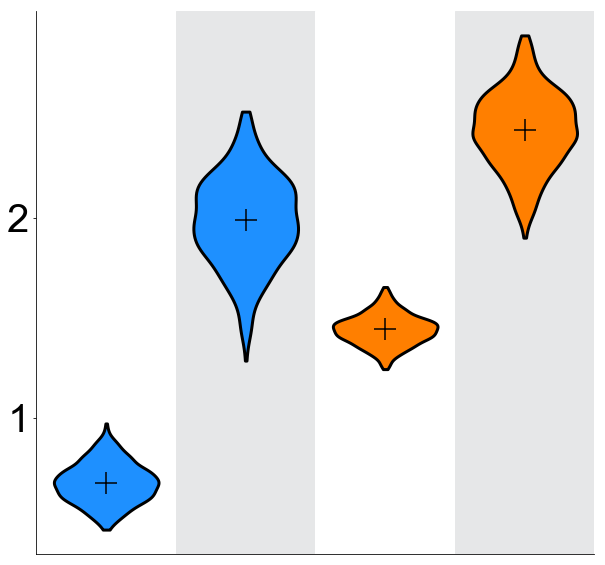

In [169]:
gene = 'Itgb1'
traces = NBR_states_traces.ix[gene]
groups = ['Lgr5 - ctrl','Lgr5 - 0','Lgr6 - ctrl - IFE','Lgr6 - 5']
cmap = {'Lgr5 - ctrl':'dodgerblue','Lgr5 - 0':'dodgerblue',
        'Lgr6 - ctrl - IFE':'#ff7f00','Lgr6 - 5':'#ff7f00'}


#initialize figure

height = 10
width = 10
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 1, hspace = 0.15, wspace = 0.0)

#create violin plot axis
    
y_min = np.min([np.log2(np.min(t)) for t in traces])
y_max = np.max([np.log2(np.max(t)) for t in traces])

ax1 = plt.subplot(gs[0,0])
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_xlim(-0.5, len(groups) - 0.5)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks(np.arange(np.floor(y_min), np.ceil(y_max),1))

#iterate over genes

for pos, gr in enumerate(groups):

    #print group traces
        
    perc_min, perc_max = np.percentile(traces[gr], 0.5), np.percentile(traces[gr], 99.5)
    violin = ax1.violinplot([np.log2(x) for x in traces[gr] if perc_min < x < perc_max],
                        positions = [pos],
                        vert=True,
                        showextrema=False, 
                        widths=0.75,)

    ax1.scatter(pos, 
                    np.median([np.log2(x) for x in traces.ix[gr]]),
                    color = 'black', marker = '+', s = 500, zorder = 2)

    for v in violin['bodies']:
        v.set_edgecolor('black')
        v.set_facecolor(cmap[gr])
        v.set_linewidth(3.0)
        v.set_alpha(1.0)

    for ix, t in enumerate(ax1.yaxis.get_ticklabels()):
        if ix % 1 != 0.5:
            t.set_family('Arial')
            t.set_fontsize(40)
        else:
            t.set_fontsize(0)
            
for x in range(len(groups)):
    if x % 2 == 1:
        ax1.axvspan(x-0.5,x+0.5,color='#E6E7E8', zorder = 0)
    else:
         ax1.axvspan(x-0.5,x+0.5,color='#FFFFFF', zorder = 0)
            
figname = 'v2.6_5_NBR_%s.pdf' % (gene)
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


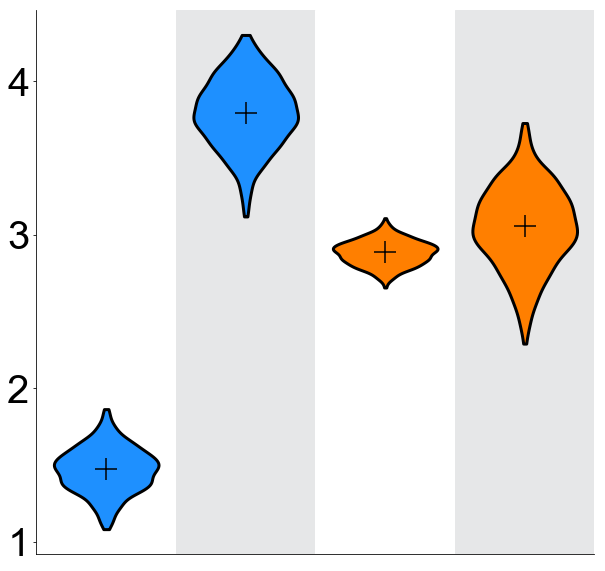

In [170]:
gene = 'Cd44'
traces = NBR_states_traces.ix[gene]
groups = ['Lgr5 - ctrl','Lgr5 - 0','Lgr6 - ctrl - IFE','Lgr6 - 5']
cmap = {'Lgr5 - ctrl':'dodgerblue','Lgr5 - 0':'dodgerblue',
        'Lgr6 - ctrl - IFE':'#ff7f00','Lgr6 - 5':'#ff7f00'}


#initialize figure

height = 10
width = 10
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 1, hspace = 0.15, wspace = 0.0)

#create violin plot axis
    
y_min = np.min([np.log2(np.min(t)) for t in traces])
y_max = np.max([np.log2(np.max(t)) for t in traces])

ax1 = plt.subplot(gs[0,0])
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_xlim(-0.5, len(groups) - 0.5)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks(np.arange(np.floor(y_min), np.ceil(y_max),1))

#iterate over genes

for pos, gr in enumerate(groups):

    #print group traces
        
    perc_min, perc_max = np.percentile(traces[gr], 0.5), np.percentile(traces[gr], 99.5)
    violin = ax1.violinplot([np.log2(x) for x in traces[gr] if perc_min < x < perc_max],
                        positions = [pos],
                        vert=True,
                        showextrema=False, 
                        widths=0.75,)

    ax1.scatter(pos, 
                    np.median([np.log2(x) for x in traces.ix[gr]]),
                    color = 'black', marker = '+', s = 500, zorder = 2)

    for v in violin['bodies']:
        v.set_edgecolor('black')
        v.set_facecolor(cmap[gr])
        v.set_linewidth(3.0)
        v.set_alpha(1.0)

    for ix, t in enumerate(ax1.yaxis.get_ticklabels()):
        if ix % 1 != 0.5:
            t.set_family('Arial')
            t.set_fontsize(40)
        else:
            t.set_fontsize(0)
            
for x in range(len(groups)):
    if x % 2 == 1:
        ax1.axvspan(x-0.5,x+0.5,color='#E6E7E8', zorder = 0)
    else:
         ax1.axvspan(x-0.5,x+0.5,color='#FFFFFF', zorder = 0)
            
figname = 'v2.6_5_NBR_%s.pdf' % (gene)
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


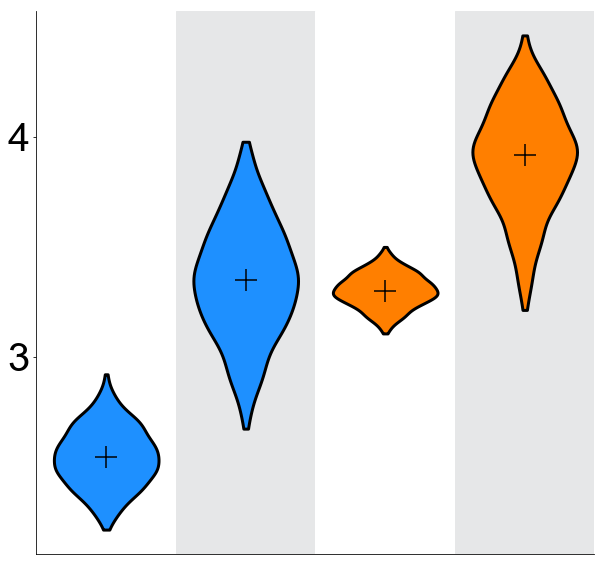

In [172]:
gene = 'Anxa1'
traces = NBR_states_traces.ix[gene]
groups = ['Lgr5 - ctrl','Lgr5 - 0','Lgr6 - ctrl - IFE','Lgr6 - 5']
cmap = {'Lgr5 - ctrl':'dodgerblue','Lgr5 - 0':'dodgerblue',
        'Lgr6 - ctrl - IFE':'#ff7f00','Lgr6 - 5':'#ff7f00'}


#initialize figure

height = 10
width = 10
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 1, hspace = 0.15, wspace = 0.0)

#create violin plot axis
    
y_min = np.min([np.log2(np.min(t)) for t in traces])
y_max = np.max([np.log2(np.max(t)) for t in traces])

ax1 = plt.subplot(gs[0,0])
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_xlim(-0.5, len(groups) - 0.5)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks(np.arange(np.floor(y_min), np.ceil(y_max),1))

#iterate over genes

for pos, gr in enumerate(groups):

    #print group traces
        
    perc_min, perc_max = np.percentile(traces[gr], 0.5), np.percentile(traces[gr], 99.5)
    violin = ax1.violinplot([np.log2(x) for x in traces[gr] if perc_min < x < perc_max],
                        positions = [pos],
                        vert=True,
                        showextrema=False, 
                        widths=0.75,)

    ax1.scatter(pos, 
                    np.median([np.log2(x) for x in traces.ix[gr]]),
                    color = 'black', marker = '+', s = 500, zorder = 2)

    for v in violin['bodies']:
        v.set_edgecolor('black')
        v.set_facecolor(cmap[gr])
        v.set_linewidth(3.0)
        v.set_alpha(1.0)

    for ix, t in enumerate(ax1.yaxis.get_ticklabels()):
        if ix % 1 != 0.5:
            t.set_family('Arial')
            t.set_fontsize(40)
        else:
            t.set_fontsize(0)
            
for x in range(len(groups)):
    if x % 2 == 1:
        ax1.axvspan(x-0.5,x+0.5,color='#E6E7E8', zorder = 0)
    else:
         ax1.axvspan(x-0.5,x+0.5,color='#FFFFFF', zorder = 0)
            
figname = 'v2.4_5_NBR_%s.pdf' % (gene)
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


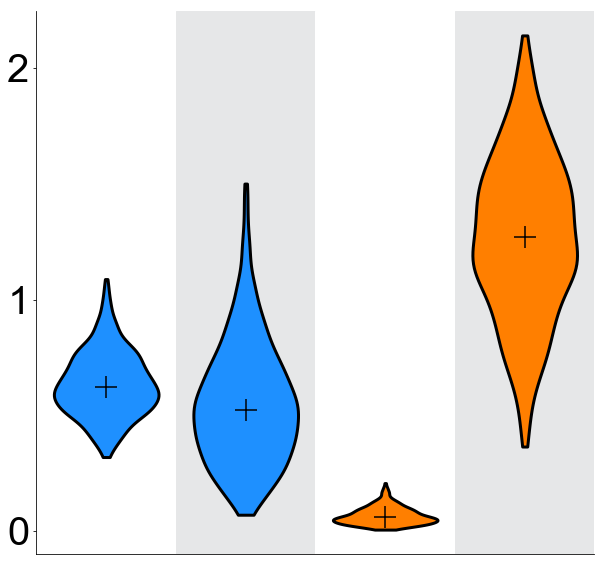

In [177]:
gene = 'Tnc'
traces = NBR_states_traces.ix[gene]
groups = ['Lgr5 - ctrl','Lgr5 - 0','Lgr6 - ctrl - IFE','Lgr6 - 5']
cmap = {'Lgr5 - ctrl':'dodgerblue','Lgr5 - 0':'dodgerblue',
        'Lgr6 - ctrl - IFE':'#ff7f00','Lgr6 - 5':'#ff7f00'}


#initialize figure

height = 10
width = 10
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 1, hspace = 0.15, wspace = 0.0)

#create violin plot axis
    
y_min = np.min([np.log2(np.min(t)) for t in traces])
y_max = np.max([np.log2(np.max(t)) for t in traces])

ax1 = plt.subplot(gs[0,0])
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_xlim(-0.5, len(groups) - 0.5)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks(np.arange(np.floor(y_min), np.ceil(y_max),1))

#iterate over genes

for pos, gr in enumerate(groups):

    #print group traces
        
    perc_min, perc_max = np.percentile(traces[gr], 0.5), np.percentile(traces[gr], 99.5)
    violin = ax1.violinplot([np.log2(x) for x in traces[gr] if perc_min < x < perc_max],
                        positions = [pos],
                        vert=True,
                        showextrema=False, 
                        widths=0.75,)

    ax1.scatter(pos, 
                    np.median([np.log2(x) for x in traces.ix[gr]]),
                    color = 'black', marker = '+', s = 500, zorder = 2)

    for v in violin['bodies']:
        v.set_edgecolor('black')
        v.set_facecolor(cmap[gr])
        v.set_linewidth(3.0)
        v.set_alpha(1.0)

    for ix, t in enumerate(ax1.yaxis.get_ticklabels()):
        if ix % 1 != 0.5:
            t.set_family('Arial')
            t.set_fontsize(40)
        else:
            t.set_fontsize(0)
            
for x in range(len(groups)):
    if x % 2 == 1:
        ax1.axvspan(x-0.5,x+0.5,color='#E6E7E8', zorder = 0)
    else:
         ax1.axvspan(x-0.5,x+0.5,color='#FFFFFF', zorder = 0)
            
figname = 'v2.4_5_NBR_%s.pdf' % (gene)
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


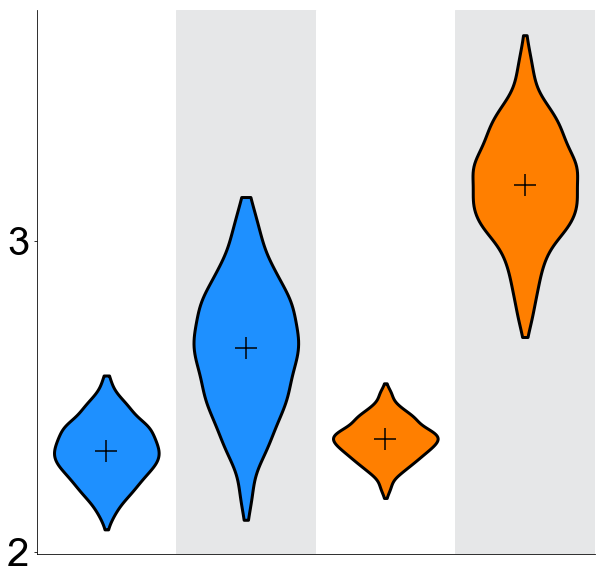

In [26]:
gene = 'Sdc1'
traces = NBR_states_traces.ix[gene]
groups = ['Lgr5 - ctrl','Lgr5 - 0','Lgr6 - ctrl - IFE','Lgr6 - 5']
cmap = {'Lgr5 - ctrl':'dodgerblue','Lgr5 - 0':'dodgerblue',
        'Lgr6 - ctrl - IFE':'#ff7f00','Lgr6 - 5':'#ff7f00'}


#initialize figure

height = 10
width = 10
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 1, hspace = 0.15, wspace = 0.0)

#create violin plot axis
    
y_min = np.min([np.log2(np.min(t)) for t in traces])
y_max = np.max([np.log2(np.max(t)) for t in traces])

ax1 = plt.subplot(gs[0,0])
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_xlim(-0.5, len(groups) - 0.5)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks(np.arange(np.floor(y_min), np.ceil(y_max),1))

#iterate over genes

for pos, gr in enumerate(groups):

    #print group traces
        
    perc_min, perc_max = np.percentile(traces[gr], 0.5), np.percentile(traces[gr], 99.5)
    violin = ax1.violinplot([np.log2(x) for x in traces[gr] if perc_min < x < perc_max],
                        positions = [pos],
                        vert=True,
                        showextrema=False, 
                        widths=0.75,)

    ax1.scatter(pos, 
                    np.median([np.log2(x) for x in traces.ix[gr]]),
                    color = 'black', marker = '+', s = 500, zorder = 2)

    for v in violin['bodies']:
        v.set_edgecolor('black')
        v.set_facecolor(cmap[gr])
        v.set_linewidth(3.0)
        v.set_alpha(1.0)

    for ix, t in enumerate(ax1.yaxis.get_ticklabels()):
        if ix % 1 != 0.5:
            t.set_family('Arial')
            t.set_fontsize(40)
        else:
            t.set_fontsize(0)
            
for x in range(len(groups)):
    if x % 2 == 1:
        ax1.axvspan(x-0.5,x+0.5,color='#E6E7E8', zorder = 0)
    else:
         ax1.axvspan(x-0.5,x+0.5,color='#FFFFFF', zorder = 0)
            
figname = 'v2.4_5_NBR_%s.pdf' % (gene)
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

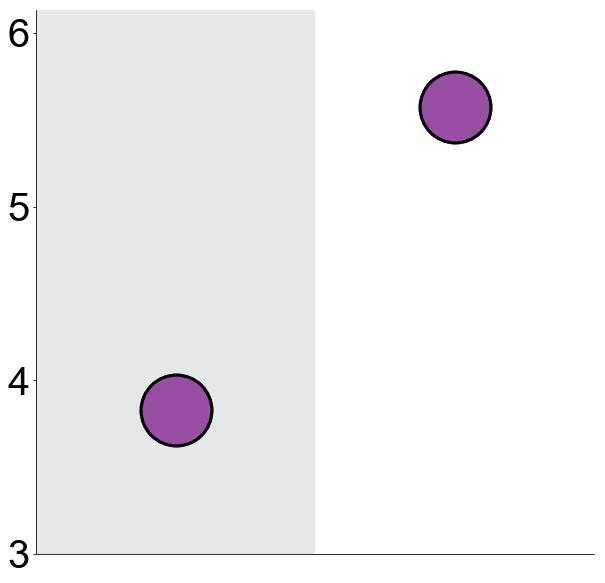

In [53]:
gene = 'Vcan'
val = bulk_24h
groups = ['value_1','value_2']
cmap = {'value_1':'#984ea3','value_2':'#984ea3'}


#initialize figure

height = 10
width = 10
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 1, hspace = 0.15, wspace = 0.0)

#create violin plot axis
    
y_min = np.min(np.log2(val.loc[gene, groups].astype(float))) * 0.9
y_max = np.max(np.log2(val.loc[gene, groups].astype(float))) * 1.1

ax1 = plt.subplot(gs[0,0])
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_xlim(-0.5, len(groups) - 0.5)
ax1.set_ylim(y_min, y_max)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks(np.arange(np.floor(y_min), np.ceil(y_max),1))

#iterate over genes

for pos, gr in enumerate(groups):

    #print group traces
    
    ax1.scatter([0,1], np.log2(val.loc[gene, groups].astype(float)), 
                c = '#984ea3', s = 5000, linewidth = 3, edgecolor = 'k')
    
    for ix, t in enumerate(ax1.yaxis.get_ticklabels()):
        if ix % 1 != 0.5:
            t.set_family('Arial')
            t.set_fontsize(40)
        else:
            t.set_fontsize(0)

for x in range(len(groups)):
    if x % 2 == 0:
        ax1.axvspan(x-0.5,x+0.5,color='#E6E7E8', zorder = 0)
    else:
         ax1.axvspan(x-0.5,x+0.5,color='#FFFFFF', zorder = 0)
            
figname = 'v2.6_5_bulk_%s.pdf' % (gene)
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)